# `Titanic`

## `概要`

### タイタニック号の乗客の情報から、生存したか否かを予測する

## `評価方法`

### 評価関数「AUC」を使用

## `説明変数`

+ PassengerId – 乗客識別ユニークID
+ Survived – 生存フラグ（0=死亡、1=生存）
+ Pclass – チケットクラス
    + 1 = 上層クラス（お金持ち）
    + 2 = 中級クラス（一般階級）
    + 3 = 下層クラス（労働階級）
+ Name – 乗客の名前
+ Sex – 性別（male=男性、female＝女性）
+ Age – 年齢
+ SibSp – タイタニックに同乗している兄弟/配偶者の数
+ parch – タイタニックに同乗している親/子供の数
+ ticket – チケット番号
+ fare – 料金
+ cabin – 客室番号
+ Embarked – 出港地（タイタニックへ乗った港）

---

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [4]:
train = pd.read_csv('/Users/kiiiita/Documents/Kaggle/titanic/train.csv')
test = pd.read_csv('/Users/kiiiita/Documents/Kaggle/titanic/test.csv')
y_test = pd.read_csv('/Users/kiiiita/Documents/Kaggle/titanic/gender_submission.csv')
dataset = pd.concat([train, test], ignore_index=True)
df_train = train
df_test = test

In [7]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#df = pd.read_table('/Users/kiiiita/Documents/Kaggle/titanic/train.csv')
#pdp.ProfileReport(df)

In [4]:
train.shape

(891, 12)

In [5]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Nameのグループ分け (敬称利用)

In [6]:
train['Name'].value_counts()

Gilnagh, Miss. Katherine "Katie"              1
Denkoff, Mr. Mitto                            1
Sage, Mr. Douglas Bullen                      1
Saad, Mr. Khalil                              1
Bishop, Mrs. Dickinson H (Helen Walton)       1
                                             ..
Webber, Mr. James                             1
Butt, Major. Archibald Willingham             1
Asplund, Miss. Lillian Gertrud                1
Strom, Mrs. Wilhelm (Elna Matilda Persson)    1
Elias, Mr. Tannous                            1
Name: Name, Length: 891, dtype: int64

---
### 敬称一覧
"""

Mr：男 , Master：男の子, Jonkheer：オランダ貴族(男), 

Mlle：マドモワゼル (フランス未婚女性), Miss：未婚女性、女の子, Mme：マダム(フランス既婚女性), Ms：女性(未婚・既婚問わず), Mrs：既婚女性, 

Don：男(スペイン), Sir：男(イギリス), the Countess：伯爵夫人, Dona：既婚女性(スペイン), Lady：既婚女性(イギリス),

Capt：船長, Col：大佐, Major：軍人, Dr：医者, Rev：聖職者や牧師

"""

[Text(0.5, 0, 'Jonkheer. ')]

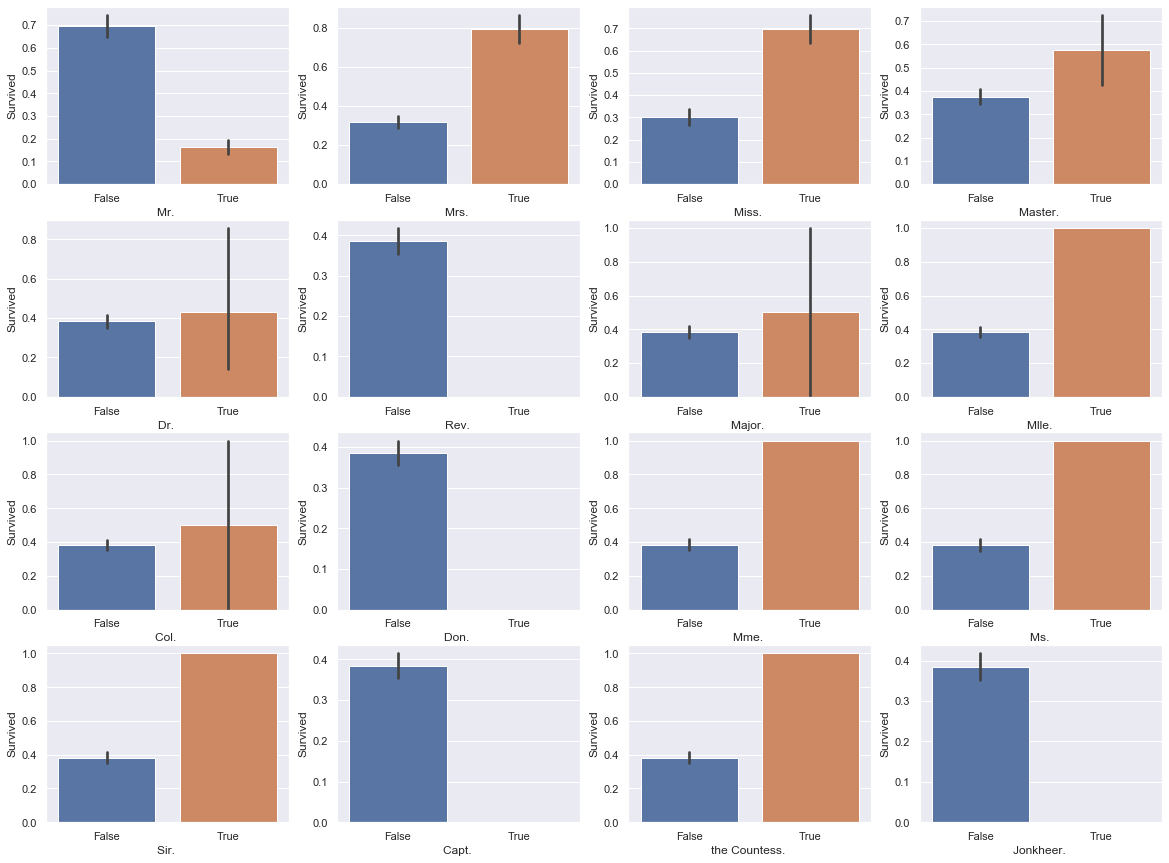

In [7]:
%matplotlib inline
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
sns.barplot(x=train['Name'].str.contains('Mr. '), y=train['Survived'], ax=axes[0,0])
axes[0,0].set(xlabel= 'Mr. ')
sns.barplot(x=train['Name'].str.contains('Mrs. '), y=train['Survived'], ax=axes[0,1])
axes[0,1].set(xlabel='Mrs. ')
sns.barplot(x=train['Name'].str.contains('Miss. '), y=train['Survived'], ax=axes[0,2])
axes[0,2].set(xlabel='Miss. ')
sns.barplot(x=train['Name'].str.contains('Master. '), y=train['Survived'], ax=axes[0,3])
axes[0,3].set(xlabel='Master. ')
sns.barplot(x=train['Name'].str.contains('Dr. '), y=train['Survived'], ax=axes[1,0])
axes[1,0].set(xlabel='Dr. ')
sns.barplot(x=train['Name'].str.contains('Rev. '), y=train['Survived'], ax=axes[1,1])
axes[1,1].set(xlabel='Rev. ')
sns.barplot(x=train['Name'].str.contains('Major. '), y=train['Survived'], ax=axes[1,2])
axes[1,2].set(xlabel='Major. ')
sns.barplot(x=train['Name'].str.contains('Mlle. '), y=train['Survived'], ax=axes[1,3])
axes[1,3].set(xlabel='Mlle. ')
sns.barplot(x=train['Name'].str.contains('Col. '), y=train['Survived'], ax=axes[2,0])
axes[2,0].set(xlabel='Col. ')
sns.barplot(x=train['Name'].str.contains('Don. '), y=train['Survived'], ax=axes[2,1])
axes[2,1].set(xlabel='Don. ')
sns.barplot(x=train['Name'].str.contains('Mme. '), y=train['Survived'], ax=axes[2,2])
axes[2,2].set(xlabel='Mme. ')
sns.barplot(x=train['Name'].str.contains('Ms. '), y=train['Survived'], ax=axes[2,3])
axes[2,3].set(xlabel='Ms. ')
sns.barplot(x=train['Name'].str.contains('Sir. '), y=train['Survived'], ax=axes[3,0])
axes[3,0].set(xlabel='Sir. ')
sns.barplot(x=train['Name'].str.contains('Capt. '), y=train['Survived'], ax=axes[3,1])
axes[3,1].set(xlabel='Capt. ')
sns.barplot(x=train['Name'].str.contains('the Countess. '), y=train['Survived'], ax=axes[3,2])
axes[3,2].set(xlabel='the Countess. ')
sns.barplot(x=train['Name'].str.contains('Jonkheer. '), y=train['Survived'], ax=axes[3,3])
axes[3,3].set(xlabel='Jonkheer. ')


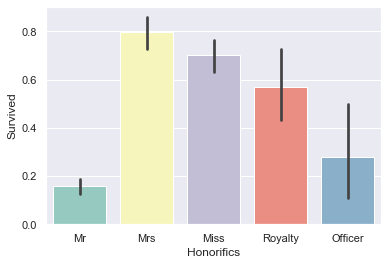

In [8]:
# 'Honorifics (敬称)による特徴別に分ける'
df_train['Honorifics'] = df_train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
df_test['Honorifics'] = df_test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

# 敬称をグループ分け
Honorifics_Dict_train = {}
Honorifics_Dict_train.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Honorifics_Dict_train.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Jonkheer', 'Master'], 'Royalty'))
Honorifics_Dict_train.update(dict.fromkeys(['Mme', 'Dona', 'Lady', 'Ms', 'Mrs'], 'Mrs'))
Honorifics_Dict_train.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Honorifics_Dict_train.update(dict.fromkeys(['Mr'], 'Mr'))
df_train['Honorifics'] = df_train['Honorifics'].map(Honorifics_Dict_train)
Honorifics_Dict_test = {}
Honorifics_Dict_test.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Honorifics_Dict_test.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Jonkheer', 'Master'], 'Royalty'))
Honorifics_Dict_test.update(dict.fromkeys(['Mme', 'Dona', 'Lady', 'Ms', 'Mrs'], 'Mrs'))
Honorifics_Dict_test.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Honorifics_Dict_test.update(dict.fromkeys(['Mr'], 'Mr'))
df_test['Honorifics'] = df_test['Honorifics'].map(Honorifics_Dict_test)

sns.barplot(x='Honorifics', y='Survived', data=df_train, palette='Set3')

In [9]:
import collections

name_group = []
for i in range(dataset.Name.shape[0]):
    name = dataset['Name'][i].split(',')[1]
    name = name.split('.')[0]
    name_group.append(name)
collections.Counter(name_group)

Counter({' Mr': 757,
         ' Mrs': 197,
         ' Miss': 260,
         ' Master': 61,
         ' Don': 1,
         ' Rev': 8,
         ' Dr': 8,
         ' Mme': 1,
         ' Ms': 2,
         ' Major': 2,
         ' Lady': 1,
         ' Sir': 1,
         ' Mlle': 2,
         ' Col': 4,
         ' Capt': 1,
         ' the Countess': 1,
         ' Jonkheer': 1,
         ' Dona': 1})

---
# チケット番号

In [10]:
df_train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [11]:
num_alpha_ticket = df_train[df_train['Ticket'].str.contains('[A-Z]+.+')]
number_ticket = df_train[df_train['Ticket'].str.match('[0-9]+')]
num_alpha_ticket_test = df_test[df_test['Ticket'].str.contains('[A-Z]+.+')]
number_ticket_test = df_test[df_test['Ticket'].str.match('[0-9]+')]

## 数字だけのチケットに着目

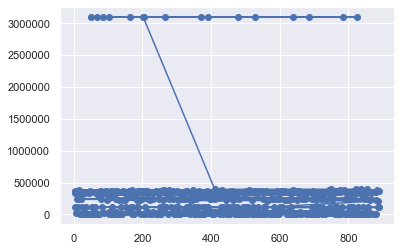

In [12]:
# 数字だけのチケットを見る
number_ticket['Ticket'] = number_ticket['Ticket'].apply(lambda x:int(x))
number_ticket_test['Ticket'] = number_ticket_test['Ticket'].apply(lambda x:int(x))
number_ticket.sort_values('Ticket', inplace=True)
number_ticket.sort_values('Ticket', inplace=True)

plt.figure()
plt.plot(number_ticket['Ticket'], '-o') # 縦軸：チケット番号 , 横軸：乗客ID
plt.show()

+ チケット番号が500000以下のグラフを表示する

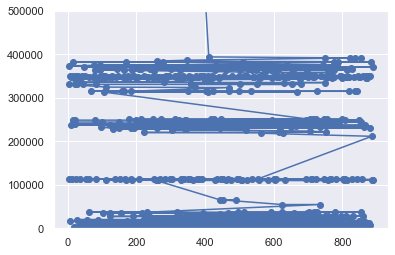

In [13]:
plt.figure()
plt.plot(number_ticket['Ticket'], '-o') # 縦軸：チケット番号 , 横軸：乗客ID
plt.ylim(0, 500000)
plt.show()

+ 各層(i=5)でグループ分けして生存率を見る

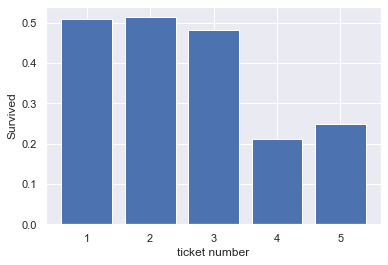

In [14]:
x = [1, 2, 3, 4, 5]

lowest_num_ticket = number_ticket[number_ticket['Ticket'] <= 100000]
sec_lowest_num_ticket = number_ticket[(number_ticket['Ticket'] > 100000) & (number_ticket['Ticket'] <= 200000)]
thir_lowest_num_ticket = number_ticket[(number_ticket['Ticket'] > 200000) & (number_ticket['Ticket'] <= 300000)]
four_lowest_num_ticket = number_ticket[(number_ticket['Ticket'] > 300000) & (number_ticket['Ticket'] <= 400000)]
high_num_ticket = number_ticket[number_ticket['Ticket'] >= 3000000]
y = [lowest_num_ticket['Survived'].mean(),sec_lowest_num_ticket['Survived'].mean(),
    thir_lowest_num_ticket['Survived'].mean(),four_lowest_num_ticket['Survived'].mean(),
    high_num_ticket['Survived'].mean()]

plt.figure()
plt.bar(x, y)
plt.xlabel('ticket number')
plt.ylabel('Survived')
plt.show()

+ 数字が大きいほど、生存率が低くなる傾向がある

## アルファベットが入ったチケットに着目

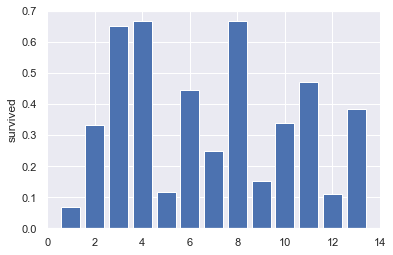

In [15]:
A_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('A.+')]
CA_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('C\.*A\.*.+')]
PC_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('PC.+')]
PP_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('PP.+')]
SOTON_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('SOTON.+')]
STON_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('STON.+')]
LINE_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('LINE.*')]
FC_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('F\.C\.(C\.)*.+')]
W_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('W.+')]
C_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('C.+')]
SC_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('S(\.)*C.+')]
SO_ticket = num_alpha_ticket[num_alpha_ticket['Ticket'].str.match('S(\.)*O.+')]
other_ticket = num_alpha_ticket[
    num_alpha_ticket['Ticket'].str.match(
        '(Fa)*(P/PP)*(S\.P)*(S\.*W)*.+'
    )
]
x = [i for i in range(1, 14)]
y = [A_ticket['Survived'].mean(), CA_ticket['Survived'].mean(), PC_ticket['Survived'].mean()
    ,PP_ticket['Survived'].mean(), SOTON_ticket['Survived'].mean(), STON_ticket['Survived'].mean()
    ,LINE_ticket['Survived'].mean(), FC_ticket['Survived'].mean(), W_ticket['Survived'].mean()
    ,C_ticket['Survived'].mean(), SC_ticket['Survived'].mean(), SO_ticket['Survived'].mean()
    ,other_ticket['Survived'].mean()
    ]
plt.figure()
plt.bar(x, y)
plt.ylabel('survived')
plt.show()

+ 漏れがないか、確認する

In [16]:
new_set = set(A_ticket['Ticket']) | set(CA_ticket['Ticket']) |\
        set(PC_ticket['Ticket']) | set(PP_ticket['Ticket']) |\
        set(SOTON_ticket['Ticket']) | set(STON_ticket['Ticket']) |\
        set(LINE_ticket['Ticket']) | set(FC_ticket['Ticket']) |\
        set(W_ticket['Ticket']) | set(C_ticket['Ticket']) |\
        set(SC_ticket['Ticket']) | set(SO_ticket['Ticket']) |\
        set(other_ticket['Ticket'])
set(num_alpha_ticket['Ticket']) - new_set

set()

In [17]:
# 生存率低い順に順位付け
number_ticket.loc[number_ticket['Ticket'] <= 100000, 'Ticket'] = 14
number_ticket.loc[(number_ticket['Ticket'] > 100000) & (number_ticket['Ticket'] <= 200000), 'Ticket'] = 15
number_ticket.loc[(number_ticket['Ticket'] > 200000) & (number_ticket['Ticket'] <= 300000), 'Ticket'] = 13
number_ticket.loc[(number_ticket['Ticket'] > 300000) & (number_ticket['Ticket'] <= 400000), 'Ticket'] = 5
number_ticket.loc[number_ticket['Ticket'] > 3000000, 'Ticket'] = 6
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('A.+'), 'Ticket'] = "1"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('C\.*A\.*.+'), 'Ticket'] = "8"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('PC.+'), 'Ticket'] = "16"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('PP.+'), 'Ticket'] = "18"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('SOTON.+'), 'Ticket'] = "3"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('STON.+'), 'Ticket'] = "11"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('LINE.*'), 'Ticket'] = "7"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('F\.C\.(C\.)*.+'), 'Ticket'] = "17"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('W.+'), 'Ticket'] = "4"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('C.+'), 'Ticket'] = "9"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('S(\.)*C.+'), 'Ticket'] = "12"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('S(\.)*O.+'), 'Ticket'] = "2"
num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('[^\d](Fa)*(P/PP)*(S\.P)*(S\.*W)*.+'), 'Ticket'] = "10"

number_ticket_test.loc[number_ticket_test['Ticket'] <= 100000, 'Ticket'] = 14
number_ticket_test.loc[(number_ticket_test['Ticket'] > 100000) & (number_ticket_test['Ticket'] <= 200000), 'Ticket'] = 15
number_ticket_test.loc[(number_ticket_test['Ticket'] > 200000) & (number_ticket_test['Ticket'] <= 300000), 'Ticket'] = 13
number_ticket_test.loc[(number_ticket_test['Ticket'] > 300000) & (number_ticket_test['Ticket'] <= 400000), 'Ticket'] = 5
number_ticket_test.loc[number_ticket_test['Ticket'] > 3000000, 'Ticket'] = 6
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('A.+'), 'Ticket'] = "1"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('C\.*A\.*.+'), 'Ticket'] = "8"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('PC.+'), 'Ticket'] = "16"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('PP.+'), 'Ticket'] = "18"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('SOTON.+'), 'Ticket'] = "3"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('STON.+'), 'Ticket'] = "11"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('LINE.*'), 'Ticket'] = "7"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('F\.C\.(C\.)*.+'), 'Ticket'] = "17"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('W.+'), 'Ticket'] = "4"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('C.+'), 'Ticket'] = "9"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('S(\.)*C.+'), 'Ticket'] = "12"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('S(\.)*O.+'), 'Ticket'] = "2"
num_alpha_ticket_test.loc[num_alpha_ticket_test['Ticket'].str.match('[^\d](Fa)*(P/PP)*(S\.P)*(S\.*W)*.+'), 'Ticket'] = "10"


num_alpha_ticket['Ticket'] = num_alpha_ticket['Ticket'].apply(lambda x: int(x))
num_alpha_ticket_test['Ticket'] = num_alpha_ticket_test['Ticket'].apply(lambda x:int(x))
df_train = pd.concat([number_ticket, num_alpha_ticket])
df_test = pd.concat([number_ticket_test, num_alpha_ticket_test])


In [18]:
df_test['Ticket']

0       5
1       5
2      13
3       5
4       6
       ..
405    12
409     3
413     1
414    16
415     3
Name: Ticket, Length: 418, dtype: int64

-------
# 補完

---
## 年齢

In [19]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Honorifics     891
dtype: int64

In [20]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

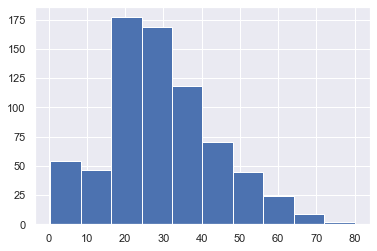

In [21]:
plt.hist(df_train['Age'])

+ 欠損値を平均値と標準偏差で補完


In [22]:
# train
Age_mean = df_train['Age'].mean()
Age_std = df_train['Age'].std()
Age_nullcount = df_train['Age'].isnull().sum()

# 正規分布従うとして、標準偏差の範囲内で数を生成
rand = np.random.randint(Age_mean - Age_std, Age_mean + Age_std,  size= Age_nullcount)

# Age欠損補完
df_train["Age"][np.isnan(df_train['Age'])] = rand

In [23]:
# test
Age_mean_test = df_test['Age'].mean()
Age_std_test = df_test['Age'].std()
Age_nullcount_test = df_test['Age'].isnull().sum()

# 正規分布従うとして、標準偏差の範囲内で数を生成
rand = np.random.randint(Age_mean_test - Age_std_test, Age_mean_test + Age_std_test,  size= Age_nullcount_test)

# Age欠損補完
df_test["Age"][np.isnan(df_test['Age'])] = rand

In [24]:
df_train['Age'].describe()

count    891.000000
mean      29.566970
std       13.490787
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Honorifics       0
dtype: int64

---
## Embarked

In [26]:
dataset[dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
C = df_train[(df_train['Embarked'] == 'C') & (df_train['Pclass'] == 1)]['Fare'].median()
print('Cの中央値', C)
S = df_train[(df_train['Embarked'] == 'S') & (df_train['Pclass'] == 1)]['Fare'].median()
print('Sの中央値', S)
Q = df_train[(df_train['Embarked'] == 'Q') & (df_train['Pclass'] == 1)]['Fare'].median()
print('Qの中央値', Q)

Cの中央値 78.2667
Sの中央値 52.0
Qの中央値 90.0


+ C の料金が一番近いから、Cにする


In [28]:
df_train['Embarked'] = df_train['Embarked'].fillna('C')
df_test['Embarked'] = df_test['Embarked'].fillna('C')

In [29]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Honorifics       0
dtype: int64

---
## Fare

In [30]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
dataset[dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


欠損データは、
+ Pclass (チケットクラス)が3(労働階級)
+ Embarked (出港地)が 'S'
+ 敬称がMr
だからそれらの中央値を代入

In [32]:
fare_median = df_test[(df_test['Embarked'] == "S") & (df_test['Pclass'] == 3) & (df_test['Honorifics'] == 'Mr')].Fare.median()

In [33]:
df_test['Fare'] = df_test['Fare'].fillna(fare_median)

---
## 家族人数

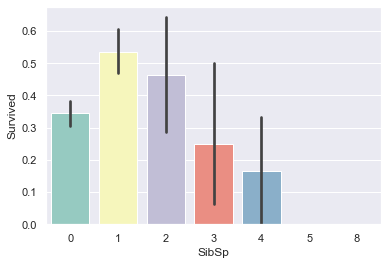

In [34]:
# 同乗してる兄弟/配偶者の数による生存比較
%matplotlib inline
sns.barplot(x='SibSp', y='Survived', data=df_train, palette="Set3")

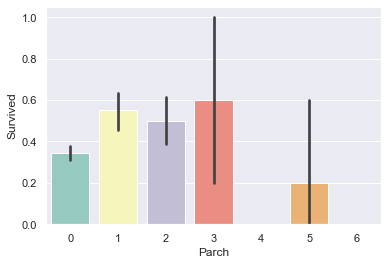

In [35]:
# 同乗してる親/子供の数による生存率比較
sns.barplot(x='Parch', y='Survived', data=df_train, palette='Set3' )

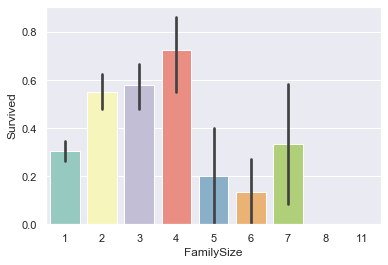

In [36]:
# 同乗している家族の数
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df_train, palette='Set3')

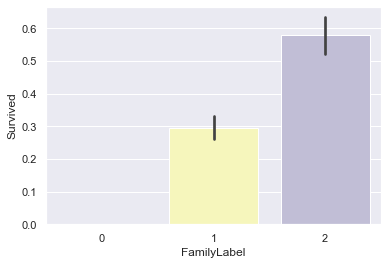

In [37]:
# 家族数による生存率でグループ分け
def Family_label(s):
    if (s>=2) & (s<=4):
        return 2
    elif (s>4) & (s<=7) | (s==1):
        return 1
    elif (s>7):
        return 0
df_train['FamilyLabel'] = df_train['FamilySize'].apply(Family_label)
df_test['FamilyLabel'] = df_test['FamilySize'].apply(Family_label)
sns.barplot(x='FamilyLabel', y='Survived', data=df_train, palette='Set3')

---
## 苗字における生存率調整
+ SibSpとParchでは、3等親以降の家族関係が不明だから、家族だけでなく苗字における生存率調査

In [38]:
# 苗字抽出
df_train['Surname'] = df_train['Name'].apply(lambda x:x.split(',')[0].rstrip())
df_test['Surname'] = df_test['Name'].apply(lambda x:x.split(',')[0].rstrip())

# 苗字の個数カウント
Surname_Count = dict(df_train['Surname'].value_counts())
Surname_Count_test = dict(df_test['Surname'].value_counts())

# 苗字の個数を代入
df_train['Surname_Count'] = df_train['Surname'].apply(lambda x:Surname_Count[x])
df_test['Surname_Count_test'] = df_test['Surname'].apply(lambda x:Surname_Count_test[x])

# 苗字にダブりがある人を、女・子供のグループと、大人で男性のグループに分ける
Female_Child_Group = df_train.loc[(df_train['Surname_Count']>=2) & ((df_train['Age']<=12) | (df_train['Sex'] == 'female'))]
Male_Adult_Group = df_train.loc[(df_train['Surname_Count']>=2) & ((df_train['Age']>12) | (df_train['Sex'] == 'male'))]
Female_Child_Group_test = df_test.loc[(df_test['Surname_Count_test']>=2) & ((df_test['Age']<=12) | (df_test['Sex'] == 'female'))]
Male_Adult_Group_test = df_test.loc[(df_test['Surname_Count_test']>=2) & ((df_test['Age']>12) | (df_test['Sex'] == 'male'))]


# 女・子供グループにおける苗字ごとの生存率平均の個数を比較
Female_Child_mean = Female_Child_Group.groupby('Surname')['Survived'].mean()
Female_Child_mean_test = Female_Child_Group_test.groupby('Surname')['Survived'].mean()

Female_Child_mean_count = pd.DataFrame(Female_Child_mean.value_counts())
Female_Child_mean_count.columns=['GroupCount']
Female_Child_mean_count

KeyError: 'Column not found: Survived'

In [ ]:
# 男性グループにおける苗字ごとの生存率平均の個数を比較
Male_Adult_mean = Male_Adult_Group.groupby('Surname')['Survived'].mean()
Male_Adult_mean_test = Male_Adult_Group_test.groupby('Surname')['Survived'].mean()

Male_Adult_mean_count = pd.DataFrame(Male_Adult_mean.value_counts())
Male_Adult_mean_count.columns=['GroupCount']
Male_Adult_mean_count

In [ ]:
# 各グループの例外を処理する
# 女性・子どもグループは、生存する確率の方が高いから生存していないグループを例外にする
# 男性グループは、生存していない確率の方が高いから生存しているグループを例外にする
Dead_List = set(Female_Child_mean_test[Female_Child_mean_test.apply(lambda x:x==0)].index)
Survived_List = set(Male_Adult_mean_test[Male_Adult_mean_test.apply(lambda x:x==1)].index)

In [ ]:
df_test.loc[(df_test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
df_test.loc[(df_test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
df_test.loc[(df_test['Surname'].apply(lambda x:x in Dead_List)),'Honorifics'] = 'Mr'
df_test.loc[(df_test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
df_test.loc[(df_test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
df_test.loc[(df_test['Surname'].apply(lambda x:x in Survived_List)),'Honorifics'] = 'Miss'

----
## 必要な項目の選択

今回はID,cabin以外　

In [39]:
df_train_columns = df_train[['Survived','Pclass','Sex','Age','Fare','Embarked','Honorifics','FamilyLabel']]
df_test_columns = df_test[['Pclass','Sex','Age','Fare','Embarked','Honorifics','FamilyLabel']]
# 'Honorifics','FamilyLabel'

In [40]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Honorifics',
       'FamilySize', 'FamilyLabel', 'Surname', 'Surname_Count'],
      dtype='object')

---
> カテゴリ変数をダミー変数にする

In [41]:
#df_train['Sex'] = pd.get_dummies(df_train['Sex'])
#df_train['Embarked'] = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked',drop_first=True)
#df_test['Sex'] = pd.get_dummies(df_test['Sex'])
#df_test['Embarked'] = pd.get_dummies(df_test, columns=['Embarked'],drop_first=True)
# drop_first : n-1列表示。多重共線性を防ぐ
df_train = pd.get_dummies(df_train_columns, columns=['Sex', 'Embarked', 'Honorifics'] ,drop_first=True)
df_test= pd.get_dummies(df_test_columns, columns=['Sex', 'Embarked', 'Honorifics'] ,drop_first=True)

---
# データ分割して、グリッドサーチ

In [13]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# 訓練・テストデータを分割
X_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]
X_test = df_test
y_test = y_test

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#scaler.fit(X_train)

# グリッドサーチで、各分類器にスケール変換するからいらない
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#columns = X_train.columns.values
#columns = X_test.columns.values
#X_train_scaled = pd.DataFrame(X_train_scaled,columns=columns)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns)

---
> グリッドサーチによるモデルの選択 (ランダムフォレスト、SVC、ロジスティック回帰)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline  import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# ランダムフォレストとSVCとロジスティック回帰
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', SVC())])

param_grid = [
    {'classifier' : [SVC()], 'preprocessing' : [MinMaxScaler(), StandardScaler()]
    ,'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]
    ,'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier' : [RandomForestClassifier(n_estimators=100)]
    ,'preprocessing' : [None], 'classifier__max_features' : [1, 2, 3]},
    {'classifier' : [LogisticRegression()], 'preprocessing' : [MinMaxScaler(), StandardScaler()]
    ,'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100]}
]

X_train_train, X_train_test, y_train_train, y_train_test \
    = train_test_split(X_train, y_train, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=10)
grid.fit(X_train_train, y_train_train)
grid.fit(X_train, y_train)
print(grid.fit(X_train, y_train))
print('訓練データスコア　：　{}'.format(grid.score(X_train_test, y_train_test)))

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            to...
                                                        

In [45]:
print('ベストパラメータ : \n{}\n'.format(grid.best_params_))
print('交差検証スコア : {}'.format(grid.best_score_))
print('テストスコア : {}'.format(grid.score(X_train_test, y_train_test)))

ベストパラメータ : 
{'classifier': SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.1, 'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1))}

交差検証スコア : 0.8182771535580524
テストスコア : 0.852017937219731




+ SVCモデルのCとgammaの関係を見る

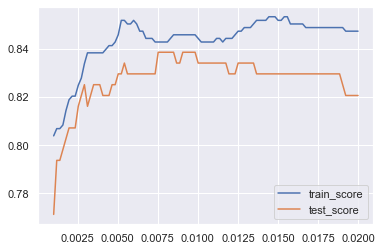

In [46]:
gamma_training_accuracy = []
gamma_test_accuracy = []

gamma_para = np.linspace(0.001, 0.02, 100)
scaler = StandardScaler()
scaler.fit(X_train_train)
x_scaler_train = scaler.transform(X_train_train)
x_scaler_test = scaler.transform(X_train_test)

for gamma in gamma_para:
    clf = SVC(C=100, gamma=gamma)
    clf.fit(x_scaler_train, y_train_train)
    # 訓練セット精度
    gamma_training_accuracy.append(clf.score(x_scaler_train, y_train_train))
    # テストセット精度
    gamma_test_accuracy.append(clf.score(x_scaler_test, y_train_test))

plt.plot(gamma_para, gamma_training_accuracy, label='train_score')
plt.plot(gamma_para, gamma_test_accuracy, label='test_score')
plt.legend()

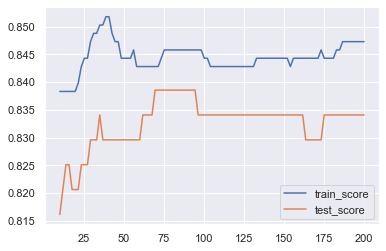

In [47]:
C_training_accuracy = []
C_test_accuracy = []
C_para = np.linspace(10, 200, 100)

for C in C_para:
    clf = SVC(C=C, gamma=0.01)
    clf.fit(x_scaler_train, y_train_train)
    # 訓練セット精度
    C_training_accuracy.append(clf.score(x_scaler_train, y_train_train))
    # テストセット精度
    C_test_accuracy.append(clf.score(x_scaler_test, y_train_test))
plt.plot(C_para, C_training_accuracy, label='train_score')
plt.plot(C_para, C_test_accuracy, label='test_score')
plt.legend()


---
>  上の結果のCとgammaを考慮して、再度SVCで操作

In [48]:
from sklearn.pipeline import make_pipeline

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid_after = {'classifier__C' : [100, 120, 125, 130, 145, 150]
                         ,'classifier__gamma' : [0.01, 0.012, 0.0128, 0.0130, 0.0145]}

grid_svc = GridSearchCV(pipe, param_grid_after, cv=10)
print(grid_svc.fit(X_train_train, y_train_train))
print('ベストパラメータ : \n{}\n'.format(grid_svc.best_params_))
print('交差検証スコア : {}'.format(grid_svc.best_score_))
print('テストスコア : {}'.format(grid_svc.score(X_train_test, y_train_test)))

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                      

+ ロジスティック回帰単体で見てみる


In [49]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression())

param_grid_rogreg = {'logisticregression__C' : [0.01, 0.1, 1, 10, 100]
                         ,'minmaxscaler' : [MinMaxScaler()]}

grid_rogreg = GridSearchCV(pipe, param_grid_rogreg, cv=10)
print(grid_rogreg.fit(X_train_train, y_train_train))
print('訓練データスコア　：　{}'.format(grid_rogreg.score(X_train_test, y_train_test)))

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           

---
> 予測する ( SVC() )

In [50]:
from sklearn import metrics
pred_train = grid.predict(X_train_test)
metrics.accuracy_score(y_train_test, pred_train)

0.852017937219731

---
> 評価する

In [51]:
df_test.head()

,Pclass,Age,Fare,FamilyLabel,Sex_male,Embarked_Q,Embarked_S,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty
0,3,34.5,7.8292,1,1,1,0,1,0,0,0
1,3,47.0,7.0000,2,0,0,1,0,1,0,0
2,2,62.0,9.6875,1,1,1,0,1,0,0,0
3,3,27.0,8.6625,1,1,0,1,1,0,0,0
4,3,22.0,12.2875,2,0,0,1,0,1,0,0


In [57]:
pred_test = grid.predict(X_test)
my_prediction = pd.DataFrame({
                                                            'PassengerId':test['PassengerId'],
                                                            'Survived':pred_test
                                                        })
my_prediction.to_csv('my_gender_submission_4.csv', index=False)

---
> 説明変数の係数評価

In [53]:
import statsmodels.api as sm

logit_model = sm.Logit(y_train_train, X_train_train)
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.443017
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  668
Model:                          Logit   Df Residuals:                      658
Method:                           MLE   Df Model:                            9
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3351
Time:                        21:39:34   Log-Likelihood:                -295.94
converged:                       True   LL-Null:                       -445.11
Covariance Type:            nonrobust   LLR p-value:                 5.845e-59
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Pclass                -0.5345      0.113     -4.723      0.000      -0.756      -0.313
Age  

-------------------
---
> ランダムフォレスト

In [54]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストの作成
RF = RandomForestClassifier(n_estimators=250, random_state=1)
RF.fit(X_train_train, y_train_train)

# 特徴量と重要度を取得
features = X_train_train.columns
importances = RF.feature_importances_

# 表にする
pd.DataFrame({'features':features, 'importances':importances}).sort_values('importances', ascending=False).reset_index()

,index,features,importances
0,2,Fare,0.258490
1,1,Age,0.250624
2,4,Sex_male,0.140475
3,7,Honorifics_Mr,0.138491
4,0,Pclass,0.090326
5,3,FamilyLabel,0.042403
6,8,Honorifics_Mrs,0.029149
7,6,Embarked_S,0.021498
8,5,Embarked_Q,0.010811
9,10,Honorifics_Royalty,0.009699


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 決定木モデルの作成
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train_train, y_train_train)

# 予測
clf_y_pred_test = clf.predict(X_train_test)

# 正解率
accuracy_score(y_train_test, clf_y_pred_test)

0.7847533632286996

In [56]:
pred_dtc_test = clf.predict(X_test)
my_prediction = pd.DataFrame({
                                                            'PassengerId':test['PassengerId'],
                                                            'Survived':pred_dtc_test
                                                        })
my_prediction.to_csv('my_gender_submission_4.csv', index=False)